<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment_2/Ass2Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

##1.Import and Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/noshowappointments/KaggleV2-May-2016.csv', sep=',', quotechar='"')

### Printing and getting info for Africa Dataset

In [81]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [82]:
df.info()
#checked if there is missing values from the coloumn
#110527 entries lot of data, 14 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [83]:
#Double check if there is missing values
df.isnull().any().sum()>0

False

####Cleaning up the data

In [0]:
df.drop(df[df['Age']<0].index,inplace=True) #dropping wrong data any age below 0

In [85]:
#deleted some rows on the handicap section as the person who set it said its only true or false so the values that are gonna be kept is 0 or 1 however, the dataset has it from 0 to 4. in this case i dropped them.
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [0]:
df.drop(df[df.Handcap > 1].index, inplace=True)

In [0]:
df[["Gender"]]=df[["Gender"]].apply(LabelEncoder().fit_transform) # 0 is female 1 is male
#dropped these as they were type str and was not necessary

In [0]:
df[["Neighbourhood"]]=df[["Neighbourhood"]].apply(LabelEncoder().fit_transform) # neighbourhood has been changed to int to make it easy to analyse
#dropped these as they were type str and was not necessary

In [0]:
#dropping these features as they can not be used as they are formatted wrong.
df.drop(columns=['ScheduledDay','AppointmentDay'],inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110327 non-null  float64
 1   AppointmentID  110327 non-null  int64  
 2   Gender         110327 non-null  int64  
 3   Age            110327 non-null  int64  
 4   Neighbourhood  110327 non-null  int64  
 5   Scholarship    110327 non-null  int64  
 6   Hipertension   110327 non-null  int64  
 7   Diabetes       110327 non-null  int64  
 8   Alcoholism     110327 non-null  int64  
 9   Handcap        110327 non-null  int64  
 10  SMS_received   110327 non-null  int64  
 11  No-show        110327 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 10.9+ MB


In [91]:
df.describe() ## shows eerything is cleaned up

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,0.349842,37.070753,41.726866,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,0.476922,23.098052,22.356232,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Changing the Target Class to Binary Representation

In [92]:
df['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

In [93]:
# binary classification 1 is No Show and 0 is Show
df['No-show']=[1 if b== 'Yes' else 0 for b in df['No-show']]
df['No-show'].value_counts()

0    88049
1    22278
Name: No-show, dtype: int64

In [94]:
print(df)

           PatientId  AppointmentID  Gender  ...  Handcap  SMS_received  No-show
0       2.987250e+13        5642903       0  ...        0             0        0
1       5.589978e+14        5642503       1  ...        0             0        0
2       4.262962e+12        5642549       0  ...        0             0        0
3       8.679512e+11        5642828       0  ...        0             0        0
4       8.841186e+12        5642494       0  ...        0             0        0
...              ...            ...     ...  ...      ...           ...      ...
110522  2.572134e+12        5651768       0  ...        0             1        0
110523  3.596266e+12        5650093       0  ...        0             1        0
110524  1.557663e+13        5630692       0  ...        0             1        0
110525  9.213493e+13        5630323       0  ...        0             1        0
110526  3.775115e+14        5629448       0  ...        0             1        0

[110327 rows x 12 columns]


Preprocessing is not necessary for this dataset

##Checking the imbalance

###Bar Graph for distribution

The distributions shows how skewed these features are. 

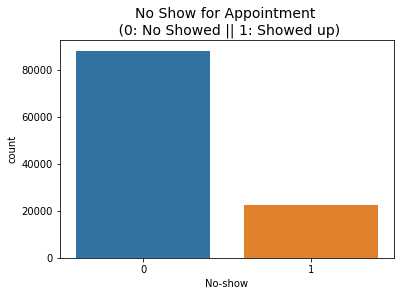

In [95]:
plt.title('No Show for Appointment \n (0: No Showed || 1: Showed up)', fontsize=14)
sns.countplot("No-show",data=df)

##Inspection of Dataset

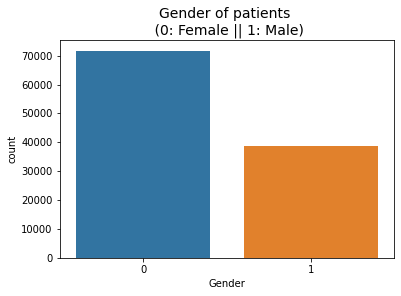

In [96]:
plt.title('Gender of patients \n (0: Female || 1: Male)', fontsize=14)
sns.countplot("Gender",data=df)

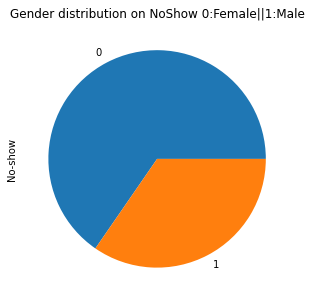

In [97]:
#Gender No Show relationship
gendernoshow=df.groupby('Gender').sum()['No-show']

gendernoshow.plot.pie(figsize=(5,5),title='Gender distribution on NoShow 0:Female||1:Male')

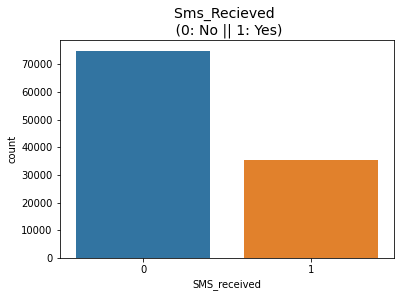

In [98]:
plt.title('Sms_Recieved \n (0: No || 1: Yes)', fontsize=14)
sns.countplot("SMS_received",data=df)

SMS_received
0    12503
1     9775
Name: No-show, dtype: int64


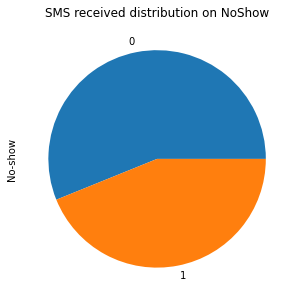

In [99]:
#SMS No Show ratio
smsnoshow=df.groupby('SMS_received').sum()['No-show']
print(smsnoshow)
smsnoshow.plot.pie(figsize=(5,5),title='SMS received distribution on NoShow')

Age
0      639
1      415
2      252
3      277
4      282
      ... 
98       1
99       0
100      0
102      0
115      3
Name: No-show, Length: 103, dtype: int64


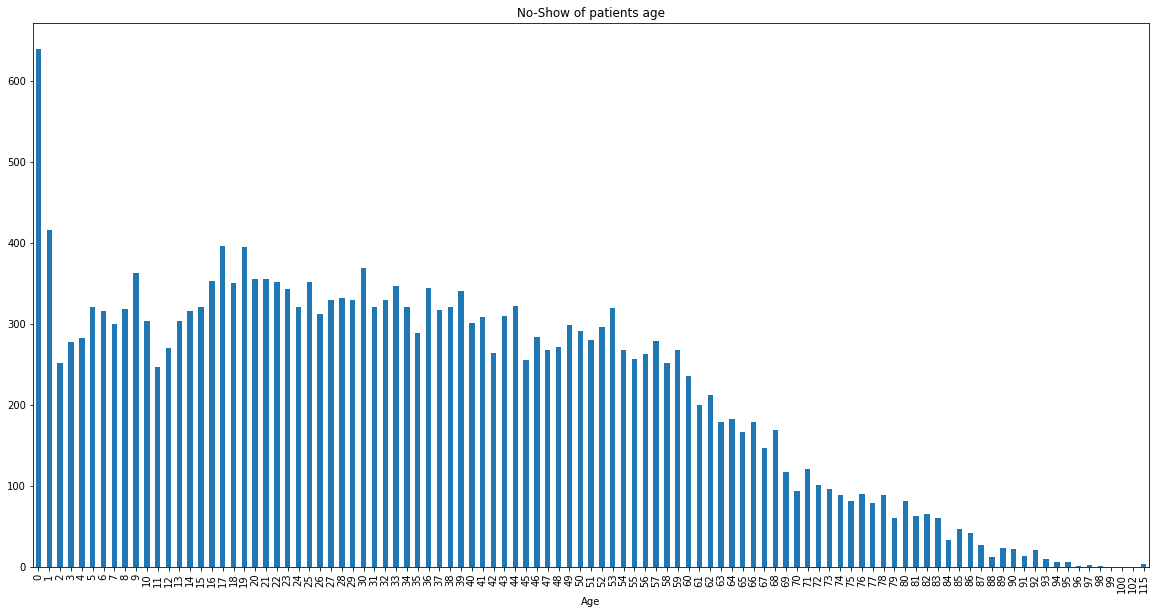

In [100]:
agenoshow=df.groupby('Age').sum()['No-show']

print(agenoshow)

agenoshow.plot(kind='bar',figsize=(20,10),title='No-Show of patients age')

Neighbourhood
38    1465
43    1219
36     921
59     903
10     701
      ... 
31       3
34       2
32       2
0        1
51       0
Name: No-show, Length: 81, dtype: int64


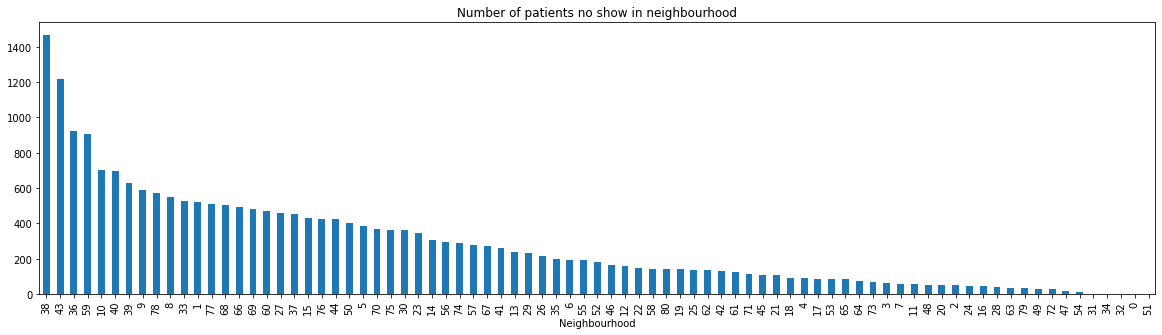

In [101]:
neighbournoshow=df.groupby('Neighbourhood').sum()['No-show'].sort_values(ascending=False) 
# number of no show patients in each hospital
print(neighbournoshow)
neighbournoshow.plot(kind='bar',figsize=(20,5),title='Number of patients no show in neighbourhood')

In [102]:
conditions=df.groupby('No-show')['Hipertension','Diabetes', 'Alcoholism','Handcap'].sum()
print(conditions)

         Hipertension  Diabetes  Alcoholism  Handcap
No-show                                             
0               17968      6478        2677     1676
1                3748      1422         675      366


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


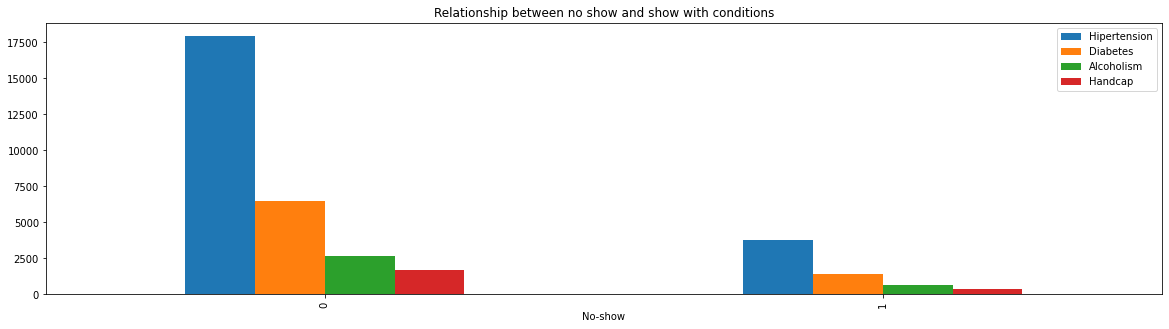

In [103]:
conditions.plot(kind='bar',figsize=(20,5),title='Relationship between no show and show with conditions')

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [0]:
x = df[df.columns[:11]] ##Predictors

y=df['No-show'] ## Target variable

In [106]:
clf = DecisionTreeClassifier(random_state=0)
DAcc_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
DPre_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
DRec_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
DF1_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates Recall
print("Accuracy:", DAcc_scores)
print("Precision:", DPre_scores)
print("Recall:", DRec_scores)
print("F1 Score:", DF1_scores)

Accuracy: [0.66165141 0.69192423 0.67932566 0.68440134 0.67343424 0.65911357
 0.68485453 0.68718274 0.72180928 0.71836476]
Precision: [0.23287185 0.25634623 0.24513619 0.25276025 0.24337439 0.23264737
 0.22476862 0.25401929 0.27795359 0.27449974]
Recall: [0.29443447 0.27648115 0.28276481 0.28770197 0.29263914 0.29937163
 0.22890485 0.28378985 0.23664122 0.24012567]
F1 Score: [0.26005946 0.26603325 0.26260942 0.2691016  0.26574282 0.26182532
 0.22681788 0.26808059 0.2556391  0.25616471]


In [107]:
print("Accuracy: %0.2f (+/- %0.2f)" % (DAcc_scores.mean(), DAcc_scores.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (DPre_scores.mean(), DPre_scores.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (DRec_scores.mean(), DRec_scores.std() * 2))
print("F1 Score: %0.2f (+/- %0.2f)" % (DF1_scores.mean(), DF1_scores.std() * 2))

Accuracy: 0.69 (+/- 0.04)
Precision: 0.25 (+/- 0.03)
Recall: 0.27 (+/- 0.05)
F1 Score: 0.26 (+/- 0.02)


In [117]:
RFC=RandomForestClassifier()

RAcc_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
RPre_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
RRec_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
RF1_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates Recall
print("Accuracy:", RAcc_scores)
print("Precision:", RPre_scores)
print("Recall:", RRec_scores)
print("F1 Score:", RF1_scores)

Accuracy: [0.77349769 0.78990302 0.77757636 0.77938911 0.77567298 0.75808937
 0.78419288 0.78807107 0.79541334 0.79260334]
Precision: [0.30620155 0.38256228 0.35684062 0.35213675 0.36352801 0.29553903
 0.31755424 0.35744681 0.4290429  0.39869281]
Recall: [0.11175943 0.0964991  0.11265709 0.08662478 0.13150808 0.14991023
 0.07046679 0.07498877 0.06017063 0.05655296]
F1 Score: [0.15871957 0.15506102 0.17160368 0.14275618 0.1892247  0.19384058
 0.11699779 0.12218891 0.09964413 0.10197628]


In [118]:
print("Accuracy: %0.2f (+/- %0.2f)" % (RAcc_scores.mean(), RAcc_scores.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (RPre_scores.mean(), RPre_scores.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (RRec_scores.mean(), RRec_scores.std() * 2))
print("F1 Score: %0.2f (+/- %0.2f)" % (RF1_scores.mean(), RF1_scores.std() * 2))

Accuracy: 0.78 (+/- 0.02)
Precision: 0.36 (+/- 0.08)
Recall: 0.10 (+/- 0.06)
F1 Score: 0.15 (+/- 0.06)


##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 

###Performing Stratified CV

In [114]:
skf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)

#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  #summarising the train and test composition
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))


>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20050, Test: 0=8805, 1=2228
>Train: 0=79244, 1=20051, Test: 0=8805, 1=2227
>Train: 0=79244, 1=20051, Test: 0=8805, 1=2227
>Train: 0=79245, 1=20050, Test: 0=8804, 1=2228


###Checking Imbalance Ratio and Graph

####Training Data

Percentage of Recession is 20.19235611057959
Percentage of No Recession is 79.8076438894204


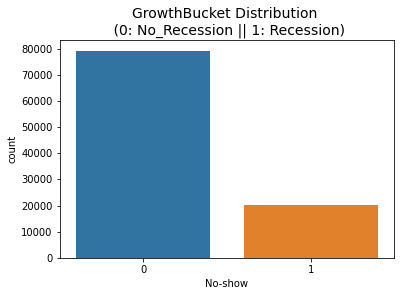

In [115]:
recession= len(ytrain[ytrain==1])
no_recession=len(ytrain[ytrain==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(ytrain,data=df)

####Test Data

Percentage of Recession is 20.195794053662077
Percentage of No Recession is 79.80420594633793


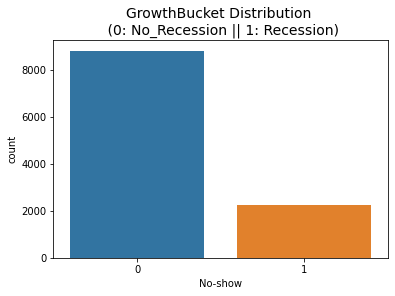

In [116]:
recession= len(ytest[ytest==1])
no_recession=len(ytest[ytest==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)

plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot(ytest,data=df)

Both sets of training and test data have similar/same unbalanced ratio. Therefore, SKF has worked. Step has been completed.